In [334]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
# Reading the CSV file containing product sales data and storing it in a DataFrame
prod_sal_dat = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\DA Professional Exam\Main\product_sales.csv')

# Printing the first few rows of the DataFrame 'prod_sal_dat'
print(prod_sal_dat.head())

   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  


In [336]:
# Extracting the column names of the DataFrame 'prod_sal_dat' and converting them to a list
prod_sal_dat_cols = prod_sal_dat.columns.tolist()

# Printing the list of column names extracted from the DataFrame 'prod_sal_dat'
print(prod_sal_dat_cols)

['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits', 'state']


In [337]:
# Identify columns with categorical data (object data type) in the DataFrame 'prod_sal_dat'
prod_sal_dat_cat_cols = prod_sal_dat.select_dtypes(include=['object'])

# Print the column names with categorical data
print(prod_sal_dat_cat_cols.columns)

Index(['sales_method', 'customer_id', 'state'], dtype='object')


In [338]:
# Calculating the number of null (missing) values in each column of the DataFrame 'prod_sal_dat'
prod_sal_dat_null_vals = prod_sal_dat.isna().sum()

# Printing the number of null values for each column
print(prod_sal_dat_null_vals)

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [339]:
# Generating descriptive statistics for the DataFrame 'prod_sal_dat'
prod_sal_dat_description = prod_sal_dat.describe()

# Printing the descriptive statistics
print(prod_sal_dat_description)

               week       nb_sold       revenue  years_as_customer  \
count  15000.000000  15000.000000  13926.000000       15000.000000   
mean       3.098267     10.084667     93.934943           4.965933   
std        1.656420      1.812213     47.435312           5.044952   
min        1.000000      7.000000     32.540000           0.000000   
25%        2.000000      9.000000     52.470000           1.000000   
50%        3.000000     10.000000     89.500000           3.000000   
75%        5.000000     11.000000    107.327500           7.000000   
max        6.000000     16.000000    238.320000          63.000000   

       nb_site_visits  
count    15000.000000  
mean        24.990867  
std          3.500914  
min         12.000000  
25%         23.000000  
50%         25.000000  
75%         27.000000  
max         41.000000  


Revenue Bins:  122


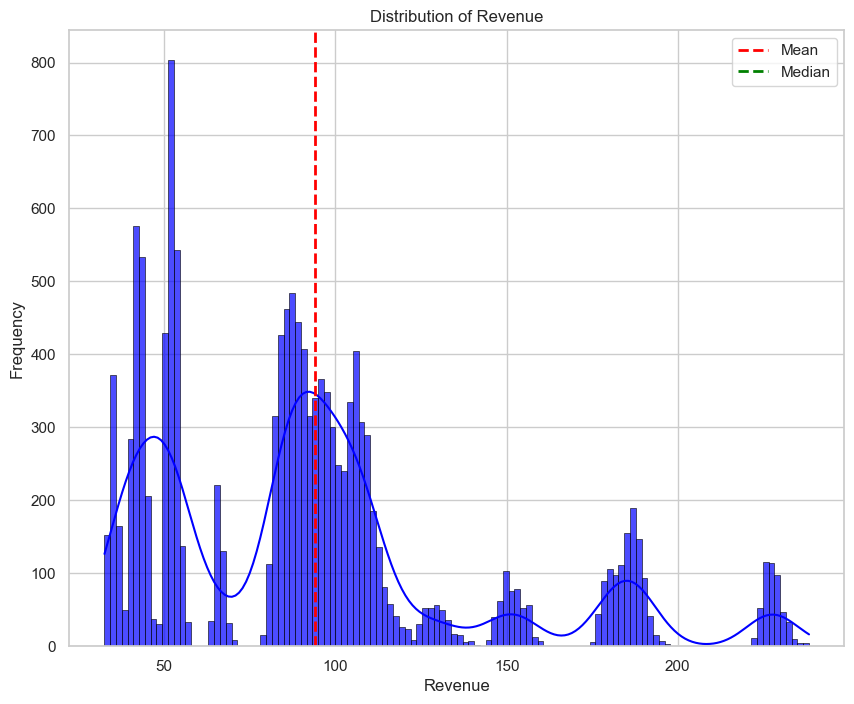

In [340]:
# Determine the number of bins for the histogram using the square root of the number of data points
rev_bins = int(np.sqrt(len(prod_sal_dat['revenue'])))
print('Revenue Bins: ', rev_bins)

# Calculate the median and mean values of the 'revenue' column
rev_median_value = np.median(prod_sal_dat['revenue'])
rev_mean_value = np.mean(prod_sal_dat['revenue'])

# Create a figure for the histogram plot
_ = plt.figure(figsize=(10, 8))

# Plotting the histogram using Seaborn
_ = sns.histplot(prod_sal_dat['revenue'], kde=True, bins=rev_bins, alpha=0.7, color='blue', edgecolor='black')

# Add vertical lines for mean and median on the histogram
_ = plt.axvline(rev_mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
_ = plt.axvline(rev_median_value, color='green', linestyle='dashed', linewidth=2, label='Median')

# Set plot title and axis labels
_ = plt.title('Distribution of Revenue')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Frequency')

# Display legend to identify mean and median lines
_ = plt.legend()

# Show the histogram plot
_ = plt.show()

# Additional comment explaining the observation from the histogram
# Clearly from the histogram, it shows that the revenue data is not symmetrical as it is right-skewed.
# Hence, the mean of the data cannot be used to fill the missing values.
# It is, therefore, better to fill the missing values with the median of the data.

In [341]:
# Checking and handling outliers in the 'revenue' variable

# Generate summary statistics for the DataFrame 'prod_sal_dat'
dat_summ_stats = prod_sal_dat.describe()

# Calculate the first quartile (25th percentile) and third quartile (75th percentile) of the 'revenue' variable
Q1 = prod_sal_dat['revenue'].quantile(0.25)
Q3 = prod_sal_dat['revenue'].quantile(0.75)

# Print the values of the first quartile and third quartile
print('Lower Quartile (25%) Value: ', Q1)
print('Upper Quartile (75%) Value: ', Q3)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
print('Interquartile Range (IQR): ', IQR)

Lower Quartile (25%) Value:  52.47
Upper Quartile (75%) Value:  107.3275
Interquartile Range (IQR):  54.8575


In [342]:
# Filling missing values in the 'revenue' column with the median value
prod_sal_dat['revenue'] = prod_sal_dat['revenue'].fillna(prod_sal_dat['revenue'].median())

# Generate descriptive statistics for the DataFrame 'prod_sal_dat' after handling missing values
prod_sal_dat_description = prod_sal_dat.describe()

# Print the descriptive statistics
print(prod_sal_dat_description)

               week       nb_sold       revenue  years_as_customer  \
count  15000.000000  15000.000000  15000.000000       15000.000000   
mean       3.098267     10.084667     93.617401           4.965933   
std        1.656420      1.812213     45.719775           5.044952   
min        1.000000      7.000000     32.540000           0.000000   
25%        2.000000      9.000000     53.040000           1.000000   
50%        3.000000     10.000000     89.500000           3.000000   
75%        5.000000     11.000000    106.070000           7.000000   
max        6.000000     16.000000    238.320000          63.000000   

       nb_site_visits  
count    15000.000000  
mean        24.990867  
std          3.500914  
min         12.000000  
25%         23.000000  
50%         25.000000  
75%         27.000000  
max         41.000000  


Revenue Bins:  122


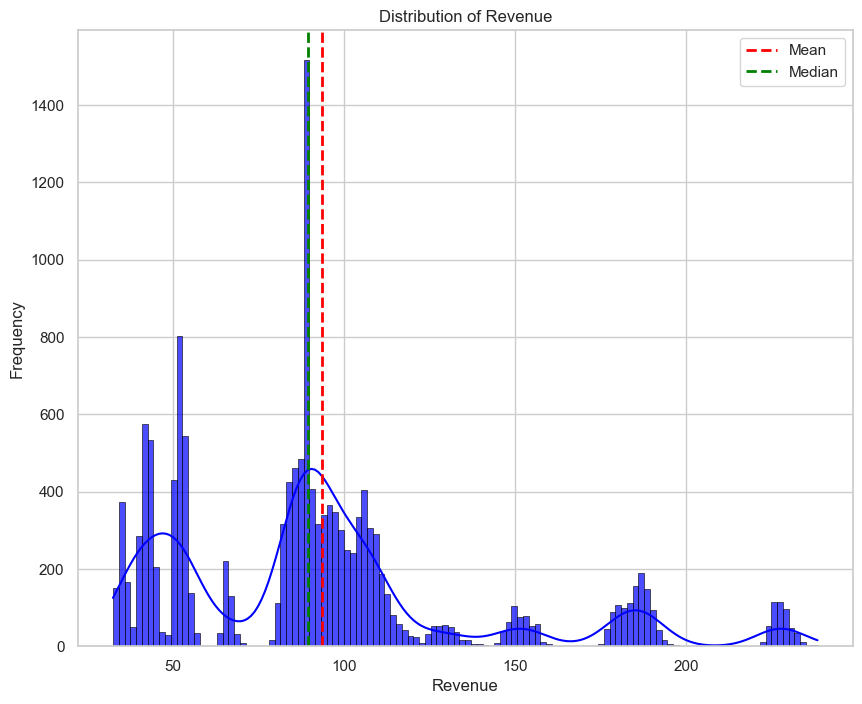

In [332]:
# Determine the number of bins for the histogram using the square root of the number of data points
rev_bins = int(np.sqrt(len(prod_sal_dat['revenue'])))
print('Revenue Bins: ', rev_bins)

# Calculate the median and mean values of the 'revenue' column
rev_median_value = np.median(prod_sal_dat['revenue'])
rev_mean_value = np.mean(prod_sal_dat['revenue'])

# Create a figure for the histogram plot
_ = plt.figure(figsize=(10, 8))

# Plotting the histogram using Seaborn
_ = sns.histplot(prod_sal_dat['revenue'], kde=True, bins=rev_bins, alpha=0.7, color='blue', edgecolor='black')

# Add vertical lines for mean and median on the histogram
_ = plt.axvline(rev_mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
_ = plt.axvline(rev_median_value, color='green', linestyle='dashed', linewidth=2, label='Median')

# Set plot title and axis labels
_ = plt.title('Distribution of Revenue')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Frequency')

# Display legend to identify mean and median lines
_ = plt.legend()

# Show the histogram plot
_ = plt.show()

# Additional comment explaining the observation from the histogram
# Clearly from the histogram, it shows that the revenue data is not symmetrical as it is right-skewed.
# Hence, the mean of the data cannot be used to fill the missing values.
# It is, therefore, better to fill the missing values with the median of the data.

In [333]:
# Checking and handling outliers in the 'revenue' variable

# Generate summary statistics for the DataFrame 'prod_sal_dat'
dat_summ_stats = prod_sal_dat.describe()

# Calculate the first quartile (25th percentile) and third quartile (75th percentile) of the 'revenue' variable
Q1 = prod_sal_dat['revenue'].quantile(0.25)
Q3 = prod_sal_dat['revenue'].quantile(0.75)

# Print the values of the first quartile and third quartile
print('Lower Quartile (25%) Value: ', Q1)
print('Upper Quartile (75%) Value: ', Q3)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
print('Interquartile Range (IQR): ', IQR)

Lower Quartile (25%) Value:  53.04
Upper Quartile (75%) Value:  106.07
Interquartile Range (IQR):  53.029999999999994


In [286]:
# Checking for and counting duplicated rows in the DataFrame 'prod_sal_dat'
prod_sal_dat_dupl = prod_sal_dat.duplicated().sum()

# Print the count of duplicated rows
print(prod_sal_dat_dupl)

0


In [288]:
# Count the occurrences of each unique value in the 'sales_method' column
sales_method_count = prod_sal_dat['sales_method'].value_counts()

# Print the count of occurrences for each unique value in 'sales_method'
print(sales_method_count)

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64


In [289]:
# Replace specific values in the 'sales_method' column
prod_sal_dat['sales_method'] = prod_sal_dat['sales_method'].replace('email', 'Email')
prod_sal_dat['sales_method'] = prod_sal_dat['sales_method'].replace('em + call', 'Email + Call')

# Count the occurrences of each unique value in the 'sales_method' column after replacement
sales_method_count = prod_sal_dat['sales_method'].value_counts()

# Print the count of occurrences for each unique value in 'sales_method' after replacement
print(sales_method_count)

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


# How many customers were there for each approach?

In [290]:
# Group customer Id by the Sales Method and count the occurrences
cust_num_by_method = prod_sal_dat.groupby('sales_method')['customer_id'].count()

# Print the count of customer occurrences for each sales method
print(cust_num_by_method)

# Calculate the total number of customers
total_customer = cust_num_by_method.sum()

# Calculate the percentage of customers for each sales method
percentage_by_method = cust_num_by_method / total_customer

# Print the percentage of customers for each sales method
print(percentage_by_method)

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64
sales_method
Call            0.330800
Email           0.497733
Email + Call    0.171467
Name: customer_id, dtype: float64


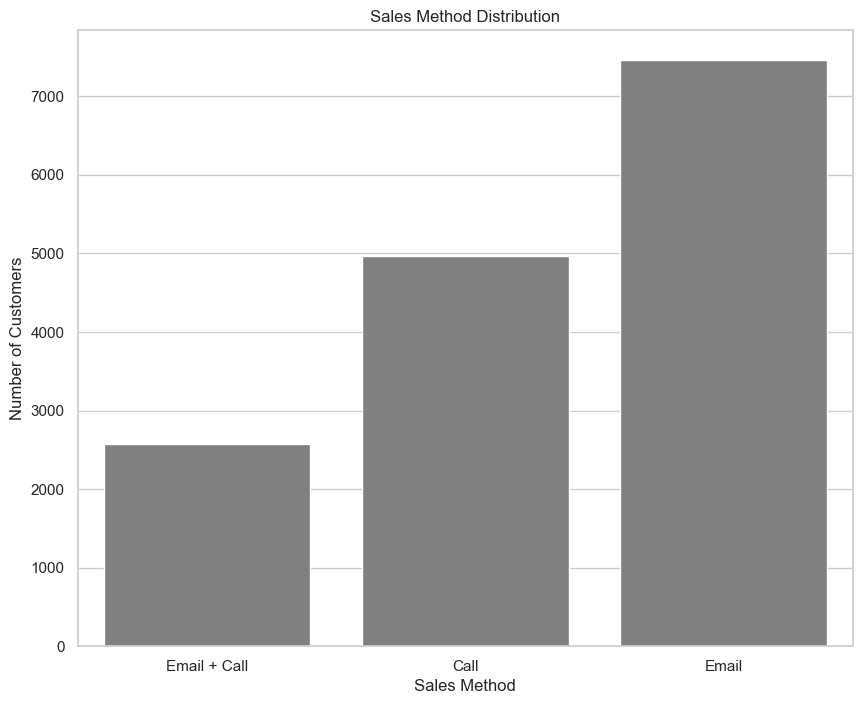

In [291]:
# Create a figure for the countplot
_ = plt.figure(figsize=(10, 8))

# Plotting a countplot using Seaborn to visualize the distribution of sales methods
_ = sns.countplot(data=prod_sal_dat, x='sales_method', color='gray', order=('Email + Call', 'Call', 'Email'))

# Set Seaborn style to 'whitegrid'
_ = sns.set_style('whitegrid')

# Customize x-axis tick rotation for better readability
_ = plt.xticks(rotation=0)

# Set x and y axis labels
_ = plt.xlabel('Sales Method')
_ = plt.ylabel('Number of Customers')

# Set plot title
_ = plt.title('Sales Method Distribution')

# Display the countplot
_ = plt.show()

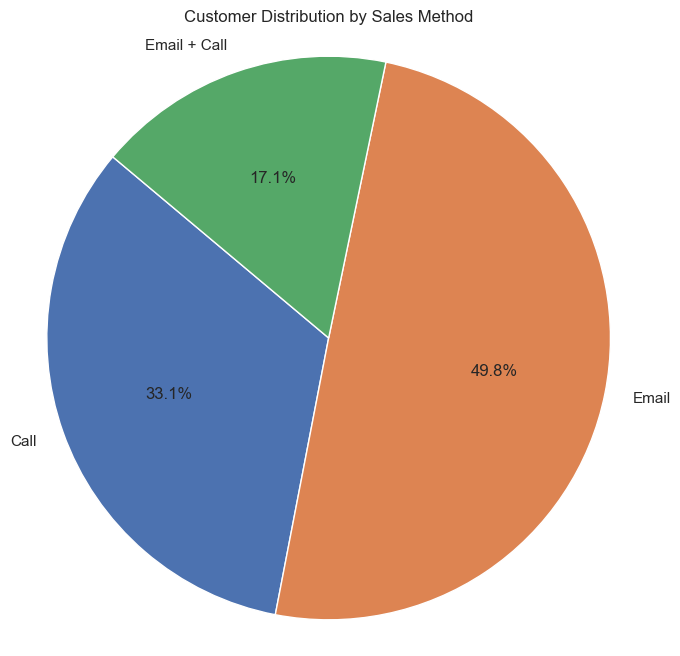

In [292]:
# Create a DataFrame for plotting with Sales Method and Percentage columns
pie_plot_dat = pd.DataFrame({'Sales Method': percentage_by_method.index, 'Percentage': percentage_by_method.values})

# Plot a pie chart
plt.figure(figsize=(8, 8))

# Set Seaborn palette to "pastel" for a visually appealing color scheme
sns.set_palette("pastel")

# Set Seaborn style to "whitegrid" for a white background
sns.set(style="whitegrid")

# Set title for the pie chart
plt.title('Customer Distribution by Sales Method')

# Plot the pie chart using the 'Percentage' column in the DataFrame
plt.pie(pie_plot_dat['Percentage'], labels=pie_plot_dat['Sales Method'], autopct='%1.1f%%', startangle=140)

# Ensure an equal aspect ratio to draw the pie chart as a circle
plt.axis('equal')

# Show the pie chart
plt.show()

# What does the spread of the revenue look like overall?

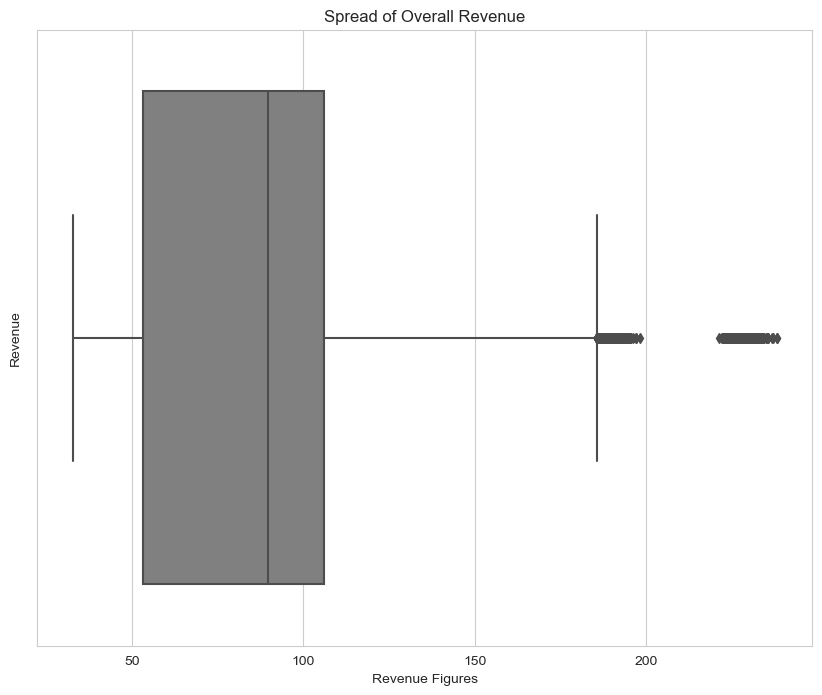

In [198]:
# Generate a boxplot to examine the spread of overall revenue
_ = plt.figure(figsize=(10, 8))

# Plotting a boxplot using Seaborn for the 'revenue' variable
_ = sns.boxplot(data=prod_sal_dat, x='revenue', color='gray')

# Set Seaborn style to 'whitegrid'
_ = sns.set_style('whitegrid')

# Set plot title
_ = plt.title('Spread of Overall Revenue')

# Set x and y axis labels
_ = plt.xlabel('Revenue Figures')
_ = plt.ylabel('Revenue')

# Display the boxplot
_ = plt.show()

# What does the spread of the revenue for each method look like?

In [293]:
# Group the 'revenue' data by sales method
rev_by_method_data = prod_sal_dat.groupby('sales_method')['revenue']

# Calculate quartiles (Q1, Q3), IQR, and median for each sales method
rev_by_method_data_percentiles = rev_by_method_data.describe(percentiles=[0.25, 0.5, 0.75])

# Extract necessary statistics
q1_values = rev_by_method_data_percentiles['25%']
q3_values = rev_by_method_data_percentiles['75%']
iqr_values = q3_values - q1_values
median_values = rev_by_method_data_percentiles['50%']

# Create a DataFrame to display the results
rev_by_method_data_percentiles_dat = pd.DataFrame({
    'Sales Method': rev_by_method_data_percentiles.index,
    'Q1': q1_values.values,
    'Q3': q3_values.values,
    'IQR': iqr_values.values,
    'Median': median_values.values
})

# Print the result DataFrame
print(rev_by_method_data_percentiles_dat)

   Sales Method        Q1        Q3      IQR   Median
0          Call   41.6300   52.9775  11.3475   49.935
1         Email   88.3900  104.4600  16.0700   94.275
2  Email + Call  149.8225  189.5350  39.7125  182.135


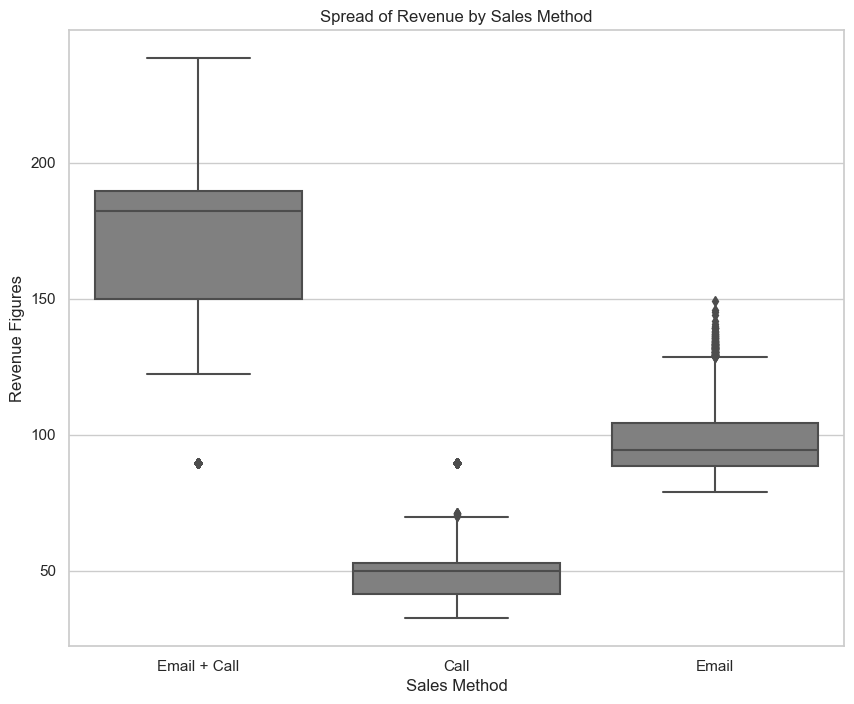

In [294]:
# Generate a boxplot to examine the spread of revenue for each sales method
_ = plt.figure(figsize=(10, 8))

# Plotting a boxplot using Seaborn for the 'revenue' variable, grouped by 'sales_method'
_ = sns.boxplot(data=prod_sal_dat, y='revenue', x='sales_method', color='gray', order=('Email + Call', 'Call', 'Email'))

# Set Seaborn style to 'whitegrid'
_ = sns.set_style('whitegrid')

# Customize x-axis tick rotation for better readability
_ = plt.xticks(rotation=0)

# Set x and y axis labels
_ = plt.xlabel('Sales Method')
_ = plt.ylabel('Revenue Figures')

# Set plot title
_ = plt.title('Spread of Revenue by Sales Method')

# Display the boxplot
_ = plt.show()

# Was there any difference in revenue over time for each of the methods?

In [295]:
# Group data by 'week' and 'sales_method', and sum the 'revenue' for each group
week_bymethod = prod_sal_dat.groupby(['week', 'sales_method']).agg({'revenue': 'sum'}).reset_index()

# Pivot the table to have 'sales_method' as columns
week_bymethod_pivot_dat = week_bymethod.pivot(index='week', columns='sales_method', values='revenue').reset_index()

# Print the resulting pivoted table
print(week_bymethod_pivot_dat)

sales_method  week      Call      Email  Email + Call
0                1  27770.18  246681.05      18406.83
1                2  36477.02  147647.07      28971.73
2                3  39290.27  106399.64      51869.64
3                4  53263.49  115395.87      83845.20
4                5  56829.61   79743.45     136744.22
5                6  30132.42   25138.75     119654.57


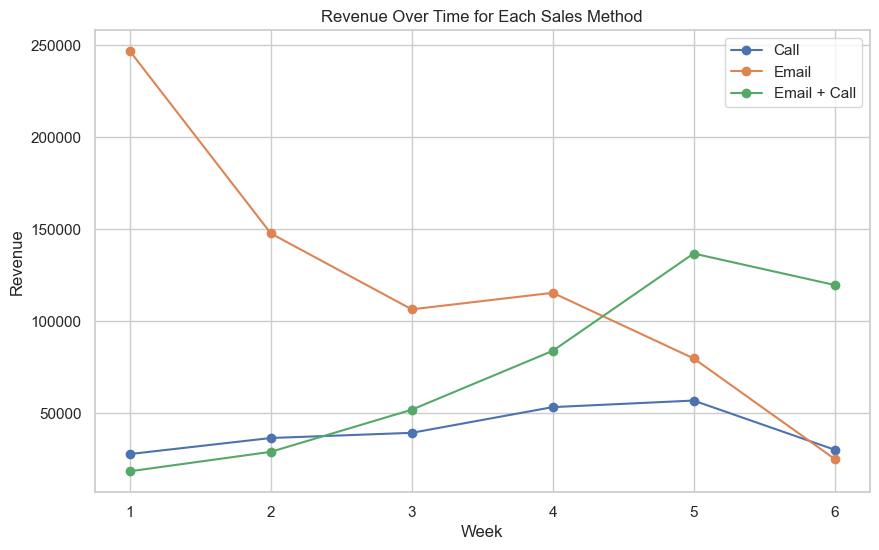

In [296]:
# Plotting
plt.figure(figsize=(10, 6))

# Iterate through sales methods and plot revenue over time
for sales_method in pivot_df.columns[1:]:
    plt.plot(pivot_df['week'], pivot_df[sales_method], label=sales_method, marker='o')

# Set plot title and labels
plt.title('Revenue Over Time for Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')

# Display legend to identify sales methods
plt.legend()

# Add grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

# Based on the data, which method would you recommend we continue to use?

In [297]:
# Total Conversion Rate
conversion_rate = (prod_sal_dat['nb_sold'].sum() / prod_sal_dat['nb_site_visits'].sum()) * 100

# Total Revenue per Site Visit
revenue_per_site_visit = prod_sal_dat['revenue'].sum() / prod_sal_dat['nb_site_visits'].sum()

# Print the results
print('Total Conversion Rate: ', round(conversion_rate, 2), '%')
print('Total Revenue per Site Visit: ', round(revenue_per_site_visit, 2))

Total Conversion Rate:  40.35 %
Total Revenue per Site Visit:  3.75


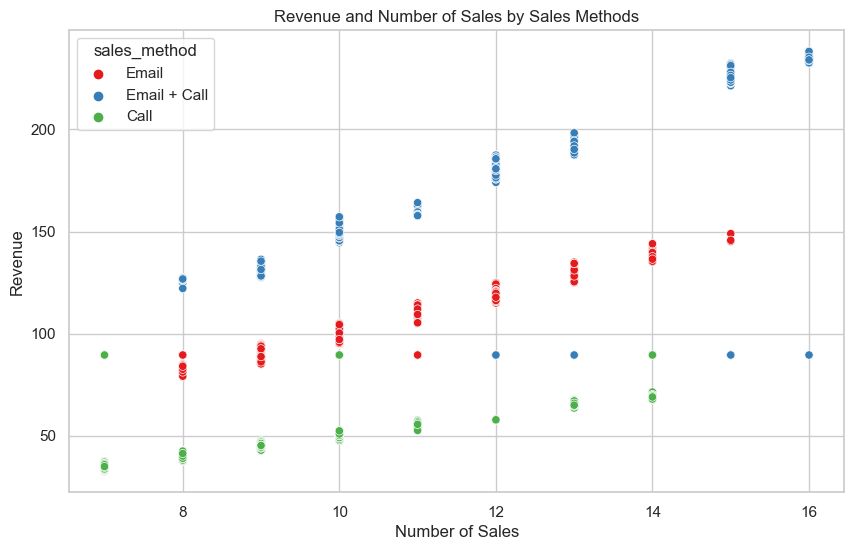

In [308]:
# Create a scatter plot with color-coded points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nb_sold', y='revenue', hue='sales_method', data=prod_sal_dat, palette='Set1')

# Customize labels and title
plt.xlabel('Number of Sales')
plt.ylabel('Revenue')
plt.title('Revenue and Number of Sales by Sales Methods')

# Show the plot
plt.show()

In [298]:
# Calculate Average Revenue for Each Sales Method
average_revenue_by_method = prod_sal_dat.groupby('sales_method')['revenue'].mean().reset_index()
average_revenue_by_method.rename(columns={'revenue': 'Average Revenue'}, inplace=True)

# Calculate Conversion Rate for Each Sales Method
conversion_rate_by_method = (prod_sal_dat.groupby('sales_method')['nb_sold'].sum() / prod_sal_dat.groupby('sales_method')['nb_site_visits'].sum()).reset_index()
conversion_rate_by_method.rename(columns={0: 'Conversion Rate'}, inplace=True)

# Merge the two metrics into a single DataFrame
metrics_by_method = pd.merge(average_revenue_by_method, conversion_rate_by_method, on='sales_method')

# Display the resulting DataFrame
print(metrics_by_method)

   sales_method  Average Revenue  Conversion Rate
0          Call        49.125955         0.389361
1         Email        96.571903         0.393034
2  Email + Call       170.875657         0.456663


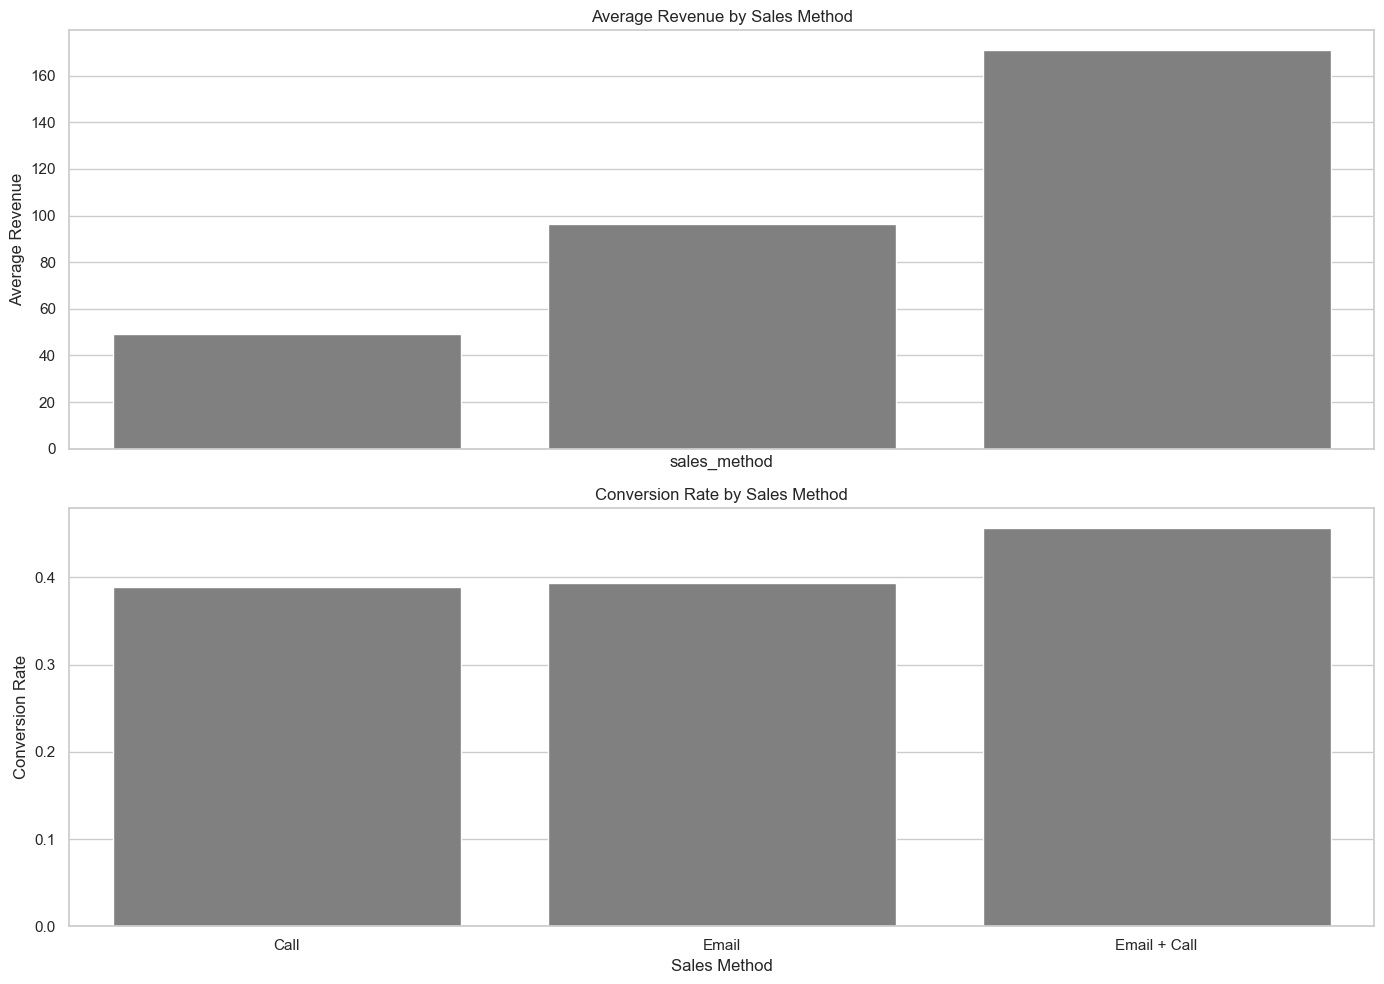

In [301]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Grouped bar plot for Average Revenue by Sales Method
sns.barplot(x='sales_method', y='Average Revenue', data=metrics_by_method, ax=axes[0], color='grey', label='Average Revenue')
axes[0].set_ylabel('Average Revenue')
axes[0].set_title('Average Revenue by Sales Method')

# Grouped bar plot for Conversion Rate by Sales Method
sns.barplot(x='sales_method', y='Conversion Rate', data=metrics_by_method, ax=axes[1], color='grey', label='Conversion Rate')
axes[1].set_xlabel('Sales Method')
axes[1].set_ylabel('Conversion Rate')
axes[1].set_title('Conversion Rate by Sales Method')

# Adjust layout to prevent clipping of x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

In [166]:
# Calculate Revenue per Site Visit for Each Sales Method
revenue_per_site_visit_by_method = prod_sal_dat.groupby('sales_method')['revenue'].sum() / prod_sal_dat.groupby('sales_method')['nb_site_visits'].sum()

# Reset the index to convert the result into a DataFrame
revenue_per_site_visit_by_method = revenue_per_site_visit_by_method.reset_index()

# Rename the column
revenue_per_site_visit_by_method.rename(columns={0: 'Revenue per Site Visit'}, inplace=True)

# Display the resulting DataFrame
print(revenue_per_site_visit_by_method)

   sales_method  Revenue per Site Visit
0          Call                2.011395
1         Email                3.901209
2  Email + Call                6.382773


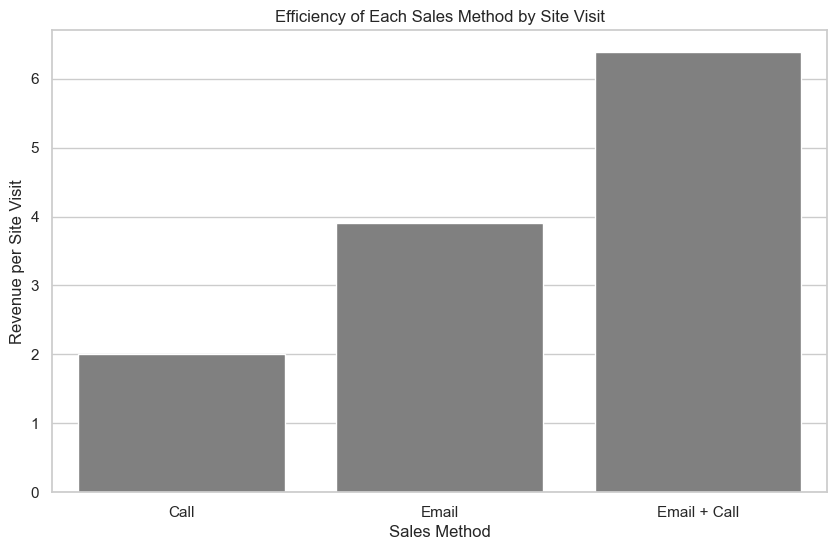

In [302]:
# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for Revenue per Site Visit by Sales Method
sns.barplot(x='sales_method', y='Revenue per Site Visit', data=revenue_per_site_visit_by_method, color='grey')

# Set labels and title
ax.set_xlabel('Sales Method')
ax.set_ylabel('Revenue per Site Visit')
ax.set_title('Efficiency of Each Sales Method by Site Visit')

# Show the plot
plt.show()

# We don’t really know if there are other differences between the customers in each group, so anything you can tell us would be really helpful to give some context to what went well.

In [169]:
# Analyze the average number of items sold per customer for each sales method
average_items_sold_by_method = prod_sal_dat.groupby('sales_method')['nb_sold'].mean().reset_index()

# Analyze the average revenue per customer for each sales method
average_revenue_by_method = prod_sal_dat.groupby('sales_method')['revenue'].mean().reset_index()

# Display the results
print("Average Number of Items Sold by Sales Method:")
print(average_items_sold_by_method)

print("\nAverage Revenue by Sales Method:")
print(average_revenue_by_method)

Average Number of Items Sold by Sales Method:
   sales_method    nb_sold
0          Call   9.509674
1         Email   9.729306
2  Email + Call  12.225505

Average Revenue by Sales Method:
   sales_method     revenue
0          Call   49.125955
1         Email   96.571903
2  Email + Call  170.875657


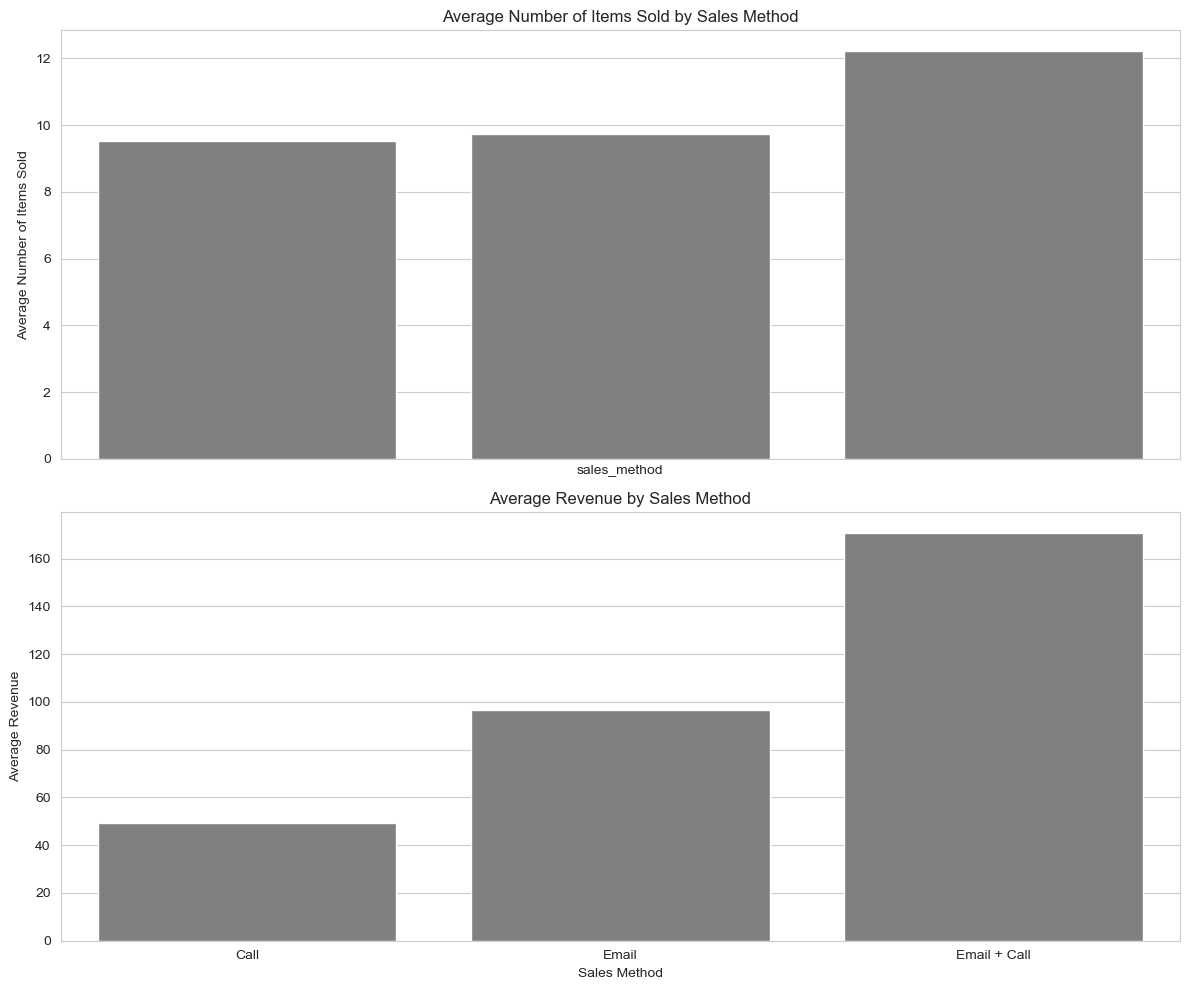

In [204]:
# Set up a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Bar plot for Average Number of Items Sold by Sales Method
sns.barplot(x='sales_method', y='nb_sold', data=average_items_sold_by_method, ax=axes[0], color='grey')
axes[0].set_ylabel('Average Number of Items Sold')
axes[0].set_title('Average Number of Items Sold by Sales Method')

# Bar plot for Average Revenue by Sales Method
sns.barplot(x='sales_method', y='revenue', data=average_revenue_by_method, ax=axes[1], color='grey')
axes[1].set_xlabel('Sales Method')
axes[1].set_ylabel('Average Revenue')
axes[1].set_title('Average Revenue by Sales Method')

# Adjust layout to prevent clipping of x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

In [303]:
# Analyze the average years as a customer by sales method
average_tenure_by_method = prod_sal_dat.groupby('sales_method')['years_as_customer'].mean().reset_index()

# Analyze the average number of site visits by sales method
average_site_visits_by_method = prod_sal_dat.groupby('sales_method')['nb_site_visits'].mean().reset_index()

# Display the results
print("Average Years as Customer by Sales Method:")
print(average_tenure_by_method)

print("\nAverage Number of Site Visits by Sales Method:")
print(average_site_visits_by_method)

Average Years as Customer by Sales Method:
   sales_method  years_as_customer
0          Call           5.176743
1         Email           4.983793
2  Email + Call           4.507387

Average Number of Site Visits by Sales Method:
   sales_method  nb_site_visits
0          Call       24.423821
1         Email       24.754353
2  Email + Call       26.771384


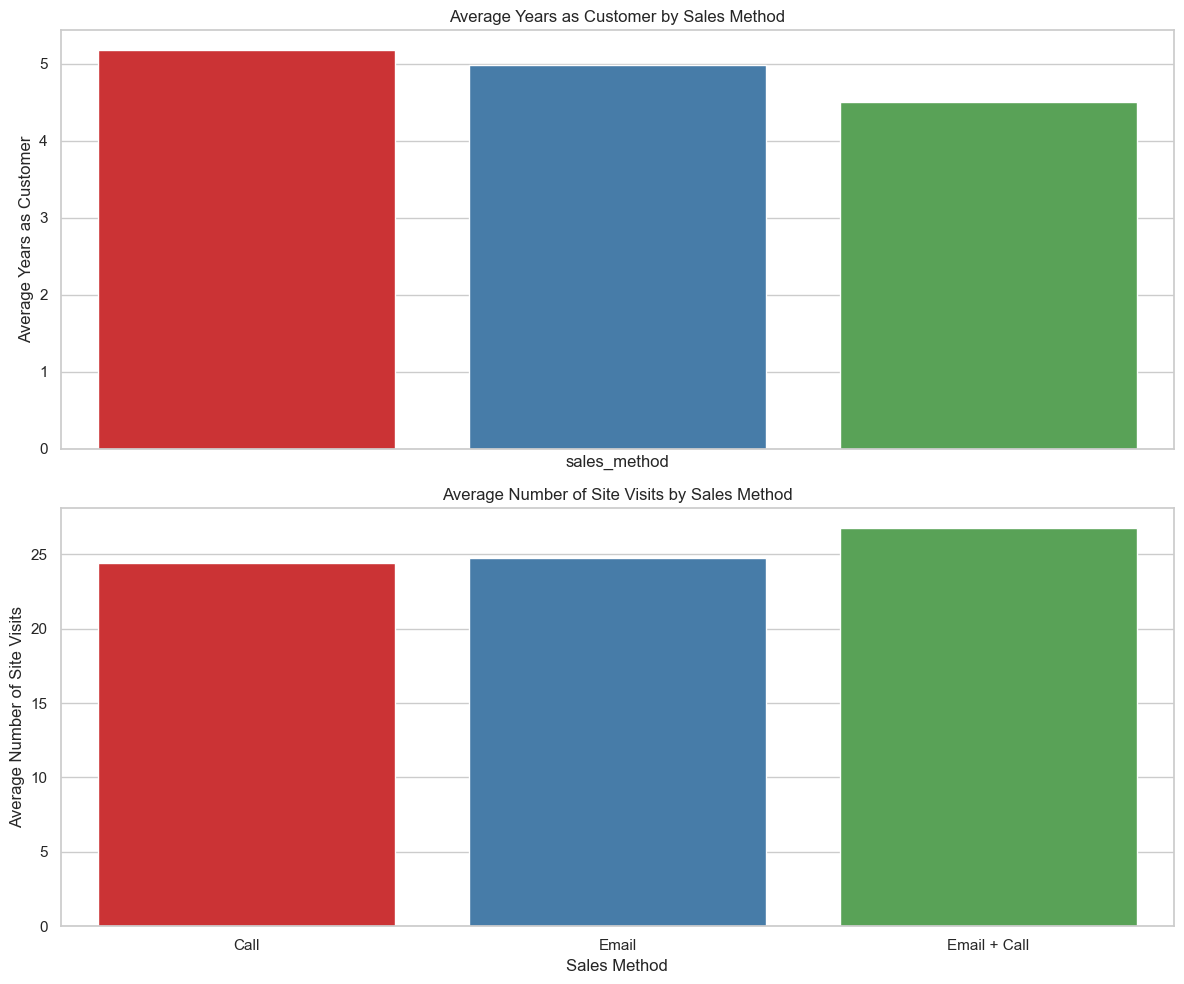

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Bar plot for Average Years as Customer by Sales Method
sns.barplot(x='sales_method', y='years_as_customer', data=average_tenure_by_method, ax=axes[0], palette='Set1')
axes[0].set_ylabel('Average Years as Customer')
axes[0].set_title('Average Years as Customer by Sales Method')

# Bar plot for Average Number of Site Visits by Sales Method
sns.barplot(x='sales_method', y='nb_site_visits', data=average_site_visits_by_method, ax=axes[1], palette='Set1')
axes[1].set_xlabel('Sales Method')
axes[1].set_ylabel('Average Number of Site Visits')
axes[1].set_title('Average Number of Site Visits by Sales Method')

# Adjust layout to prevent clipping of x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

In [305]:
# Analyze customer distribution by state and sales method
state_distribution_by_method = prod_sal_dat.groupby(['sales_method', 'state']).size().unstack().reset_index()

# Display the results
print("Customer Distribution by State and Sales Method:")
print(state_distribution_by_method)

Customer Distribution by State and Sales Method:
state  sales_method  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
0              Call       63      13      117        51         642        72   
1             Email      112      21      147        59         921       122   
2      Email + Call       39       6       57        22         309        36   

state  Connecticut  Delaware  Florida  ...  South Dakota  Tennessee  Texas  \
0               60         9      297  ...            11        128    377   
1               78        17      452  ...            20        159    598   
2               41         8      155  ...            10         53    212   

state  Utah  Vermont  Virginia  Washington  West Virginia  Wisconsin  Wyoming  
0        38        9       112         104             23         79       12  
1        66       11       191         158             46        129       15  
2        20        8        69          73             16         45     

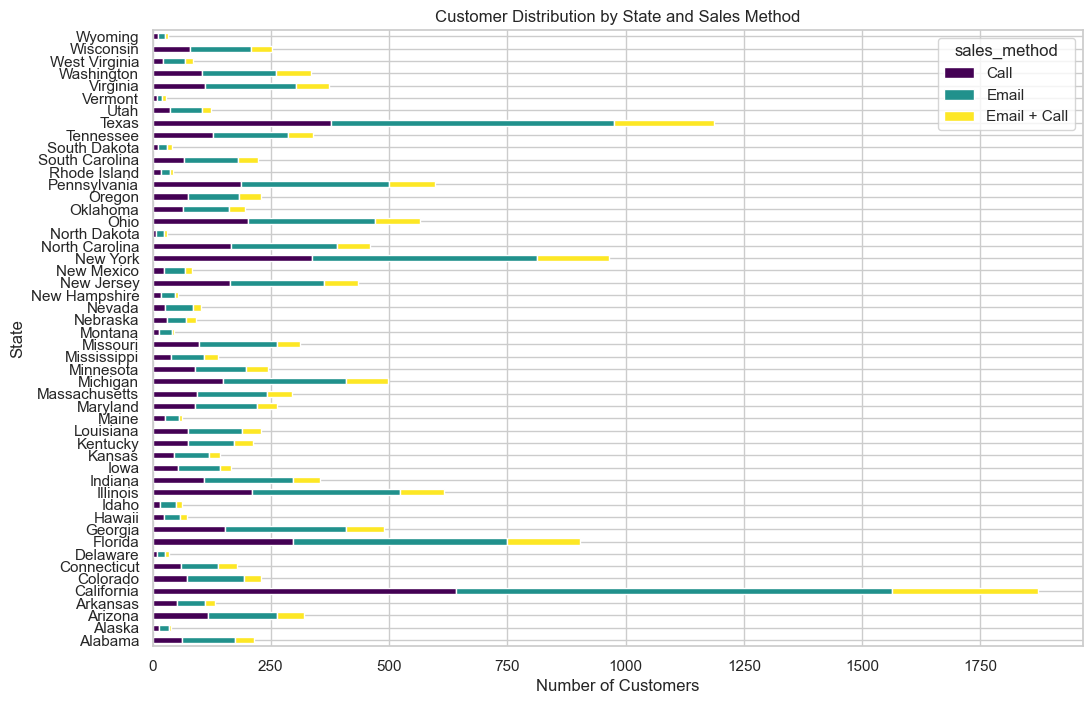

In [260]:
# Set up a figure with a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Stacked bar plot for Customer Distribution by State and Sales Method
state_distribution_by_method.set_index('sales_method').T.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')

# Set labels and title
ax.set_xlabel('Number of Customers')
ax.set_ylabel('State')
ax.set_title('Customer Distribution by State and Sales Method')

# Show the plot
plt.show()

Correlation Matrix:
                       week   nb_sold   revenue  years_as_customer  \
week               1.000000  0.809887  0.340800          -0.082334   
nb_sold            0.809887  1.000000  0.660017          -0.099117   
revenue            0.340800  0.660017  1.000000          -0.062120   
years_as_customer -0.082334 -0.099117 -0.062120           1.000000   
nb_site_visits     0.419038  0.490718  0.309244          -0.048860   

                   nb_site_visits  
week                     0.419038  
nb_sold                  0.490718  
revenue                  0.309244  
years_as_customer       -0.048860  
nb_site_visits           1.000000  


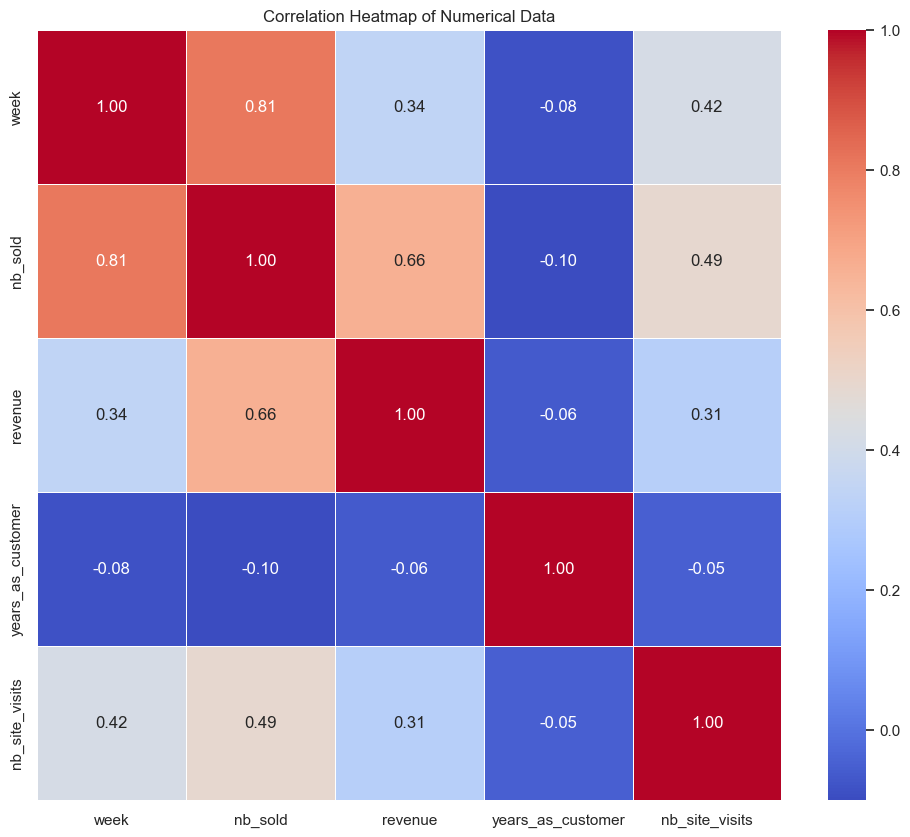

In [306]:
# Select numerical columns
numerical_columns = prod_sal_dat.select_dtypes(include=['number']).columns.tolist()

# Extract numerical data
numerical_data = prod_sal_dat[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Data")
plt.show()

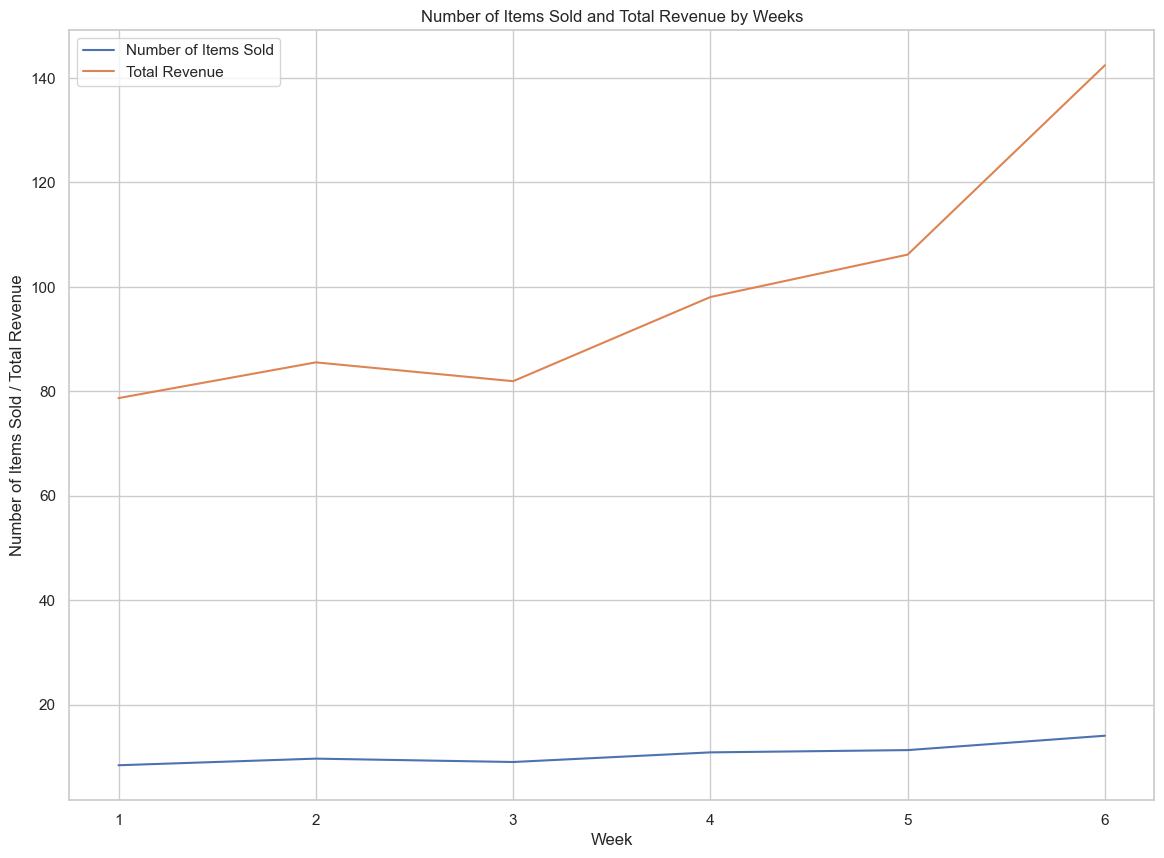

In [307]:
# Set up a figure
_ = plt.figure(figsize=(14, 10))

# Line plot for Number of Items Sold
_ = sns.lineplot(x='week', y='nb_sold', data=prod_sal_dat, errorbar=None, label='Number of Items Sold')

# Line plot for Total Revenue
_ = sns.lineplot(x='week', y='revenue', data=prod_sal_dat, errorbar=None, label='Total Revenue')

# Set title and axis labels
_ = plt.title('Number of Items Sold and Total Revenue by Weeks')
_ = plt.xlabel('Week')
_ = plt.ylabel('Number of Items Sold / Total Revenue')

# Add legend
_ = plt.legend()

# Show the plot
_ = plt.show()

# Creating a Business Metric

In [309]:
# Calculate Average Customer Tenure
ave_customer_tenure = prod_sal_dat['years_as_customer'].mean()

# Calculate Retention Rate
unique_customers_first_purchase = prod_sal_dat.groupby('customer_id')['years_as_customer'].min()
retention_rate = (unique_customers_first_purchase >= 1).mean() * 100
# Assuming a customer is considered retained if they have been a customer for at least 1 year

# Display the calculated metrics
print('Average Customer Tenure: ', round(ave_customer_tenure, 2), ' years')
print('Retention Rate: ', round(retention_rate, 2), '%')

Average Customer Tenure:  4.97  years
Retention Rate:  90.19 %


Years as Customer Median Value:  3.0
Years as Customer Mean Value:  4.965933333333333
Years as Customer Bins:  122


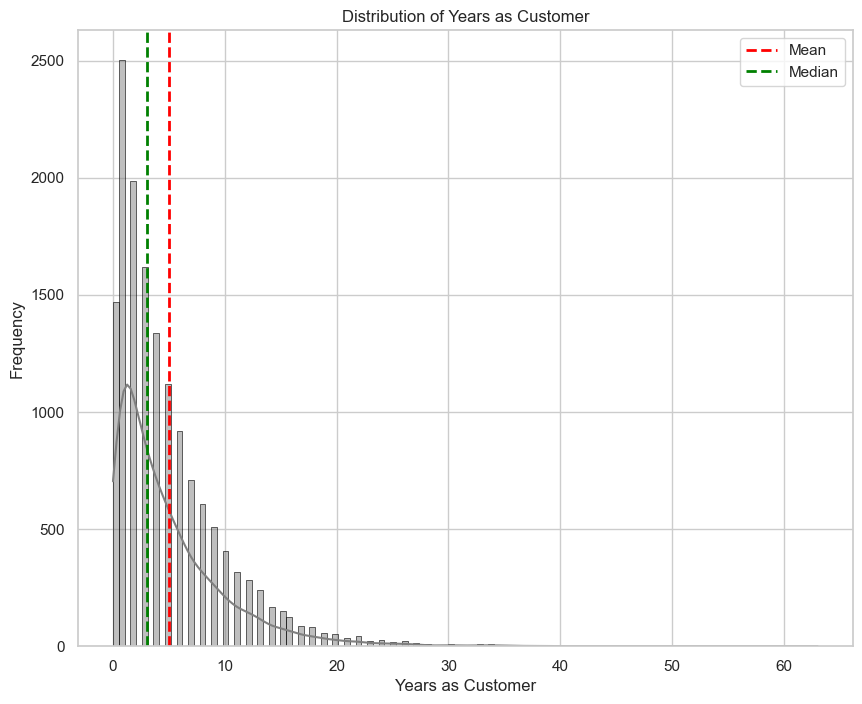

In [311]:
# Calculate median and mean values
cust_no_years_median_value = np.median(prod_sal_dat['years_as_customer'])
cust_no_years_mean_value = np.mean(prod_sal_dat['years_as_customer'])

# Print the calculated values
print('Years as Customer Median Value: ', cust_no_years_median_value)
print('Years as Customer Mean Value: ', cust_no_years_mean_value)

# Determine the number of bins for the histogram
cust_no_years_bins = int(np.sqrt(len(prod_sal_dat['years_as_customer'])))
print('Years as Customer Bins: ', cust_no_years_bins)

# Set up the figure
plt.figure(figsize=(10, 8))

# Distribution of 'years_as_customer' with a KDE plot
sns.histplot(prod_sal_dat['years_as_customer'], bins=cust_no_years_bins, kde=True, color='grey', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(cust_no_years_mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(cust_no_years_median_value, color='green', linestyle='dashed', linewidth=2, label='Median')

# Add legend
plt.legend()
plt.title('Distribution of Years as Customer')
plt.xlabel('Years as Customer')
plt.ylabel('Frequency')
plt.show()

In [312]:
# Calculate average revenue per purchase
avg_revenue_per_purchase = prod_sal_dat['revenue'].sum() / prod_sal_dat['nb_sold'].sum()
print('Average Revenue per Purchase: ', round(avg_revenue_per_purchase, 2))

# Calculate average number of purchases per year
avg_purchases_per_year = prod_sal_dat['nb_sold'].sum() / prod_sal_dat['years_as_customer'].max()
print('Average Number of Purchases per Year: ', round(avg_purchases_per_year, 2))

# Assume Customer Lifespan (in years)
customer_lifespan = ave_customer_tenure  # You can adjust this based on your business context

# Estimate Customer Lifetime Value (CLV)
clv_estimate = avg_revenue_per_purchase * avg_purchases_per_year * customer_lifespan

print('Estimated Customer Lifetime Value: $', round(clv_estimate, 2))

Average Revenue per Purchase:  9.28
Average Number of Purchases per Year:  2401.11
Estimated Customer Lifetime Value: $ 110689.95


In [314]:
# Total Sales by State
total_sales_by_state = prod_sal_dat.groupby('state')['nb_sold'].sum().reset_index()
total_sales_by_state.rename(columns={'nb_sold': 'Total Sales'}, inplace=True)

# Average Revenue per Customer by State
average_revenue_by_state = prod_sal_dat.groupby('state')['revenue'].mean().reset_index()
average_revenue_by_state.rename(columns={'revenue': 'Average Revenue per Customer'}, inplace=True)

# Merge the two metrics into a single DataFrame
sales_metrics_by_state = pd.merge(total_sales_by_state, average_revenue_by_state, on='state')

# Display the resulting DataFrame
print("Sales Metrics by State:")
print(sales_metrics_by_state)

Sales Metrics by State:
             state  Total Sales  Average Revenue per Customer
0          Alabama         2161                     96.532056
1           Alaska          412                     91.187250
2          Arizona         3238                     91.988100
3         Arkansas         1327                     91.275606
4       California        18859                     92.384824
5         Colorado         2322                     91.984696
6      Connecticut         1816                     97.355587
7         Delaware          350                    100.215294
8          Florida         9201                     93.620299
9          Georgia         4930                     94.114335
10          Hawaii          740                     96.849306
11           Idaho          620                    101.498226
12        Illinois         6143                     91.278525
13         Indiana         3558                     93.335508
14            Iowa         1672               

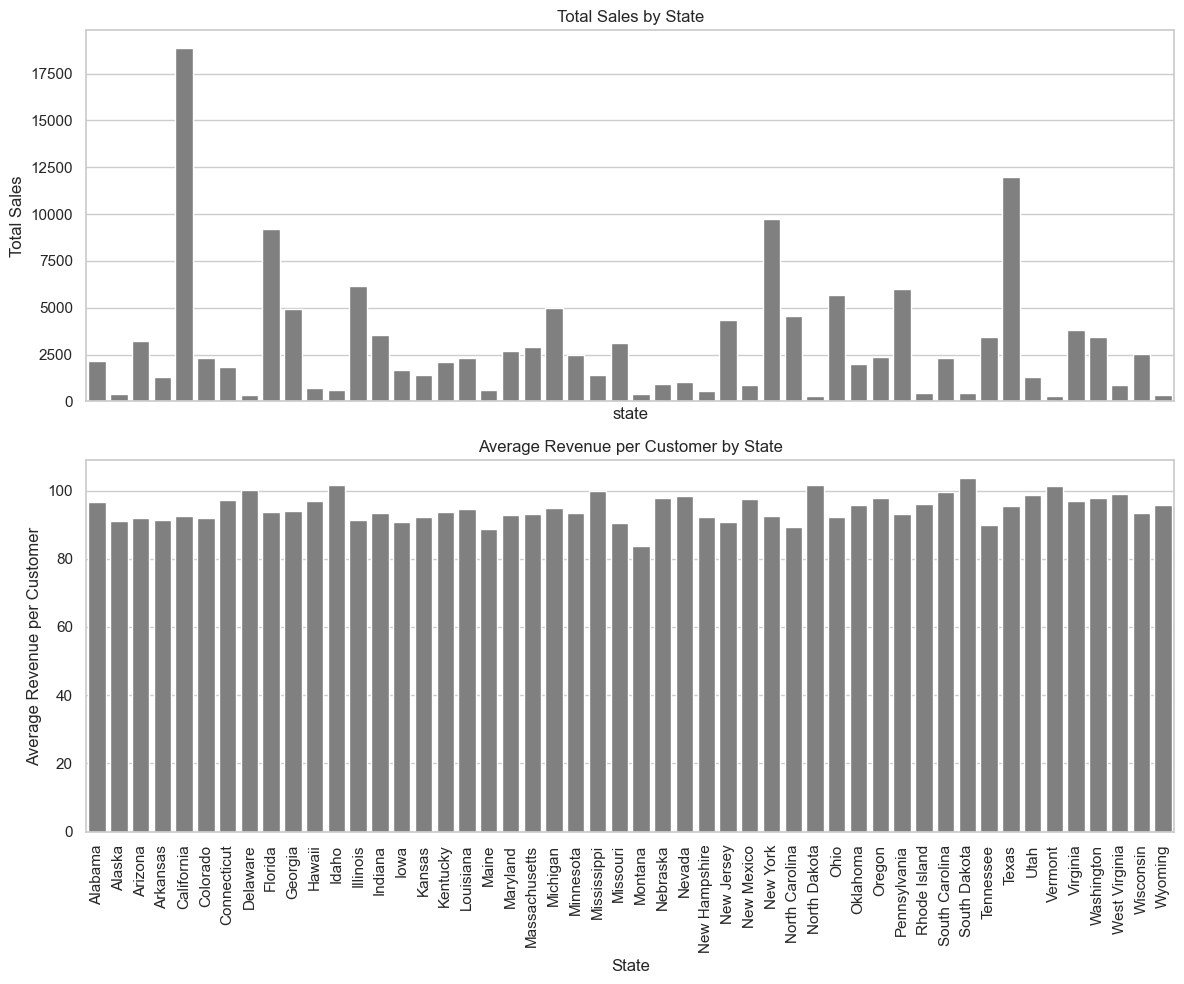

In [318]:
# Set up a subplots figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Bar plot for Total Sales by State
sns.barplot(x='state', y='Total Sales', data=sales_metrics_by_state, ax=axes[0], color='grey')
axes[0].set_ylabel('Total Sales')
axes[0].set_title('Total Sales by State')

# Bar plot for Average Revenue per Customer by State
sns.barplot(x='state', y='Average Revenue per Customer', data=sales_metrics_by_state, ax=axes[1], color='grey')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Average Revenue per Customer')
axes[1].set_title('Average Revenue per Customer by State')
plt.xticks(rotation=90)

# Adjust layout to prevent clipping of x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

In [186]:
# METRIC: Total Sales and Total Revenue by Sales Method

# Total Sales by Sales Method
items_sold_by_method = prod_sal_dat.groupby('sales_method')['nb_sold'].sum().reset_index()
items_sold_by_method.rename(columns={'nb_sold': 'Number of Items Sold'}, inplace=True)

# Total Revenue by Sales Method
total_revenue_by_method = prod_sal_dat.groupby('sales_method')['revenue'].sum().reset_index()
total_revenue_by_method.rename(columns={'revenue': 'Total Revenue'}, inplace=True)

# Merge the two metrics into a single DataFrame
sales_metrics_by_method = pd.merge(items_sold_by_method, total_revenue_by_method, on='sales_method')

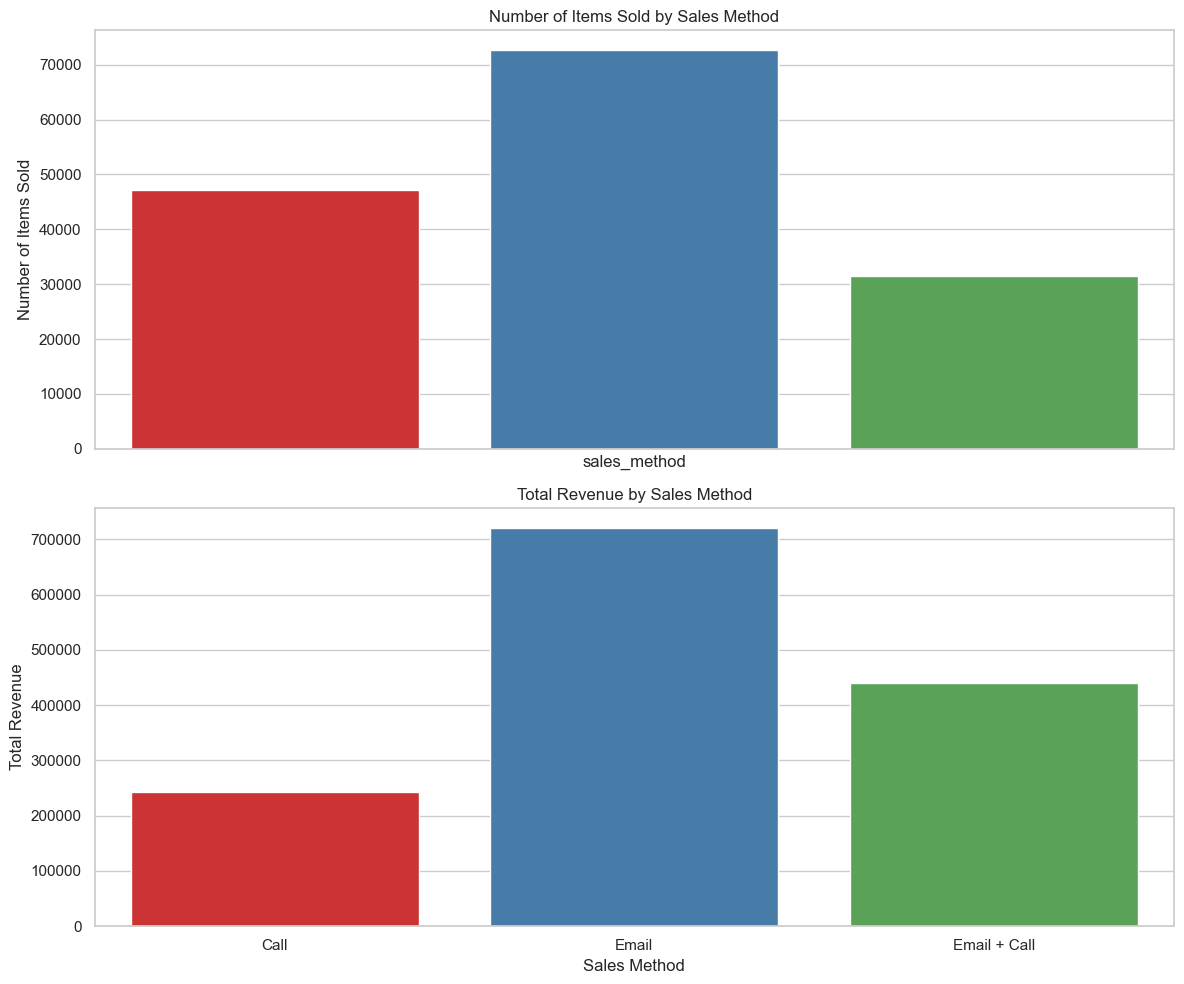

In [319]:
# Set up a subplots figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Bar plot for Total Sales by Sales Method
sns.barplot(x='sales_method', y='Number of Items Sold', data=sales_metrics_by_method, ax=axes[0], palette='Set1')
axes[0].set_ylabel('Number of Items Sold')
axes[0].set_title('Number of Items Sold by Sales Method')

# Bar plot for Total Revenue by Sales Method
sns.barplot(x='sales_method', y='Total Revenue', data=sales_metrics_by_method, ax=axes[1], palette='Set1')
axes[1].set_xlabel('Sales Method')
axes[1].set_ylabel('Total Revenue')
axes[1].set_title('Total Revenue by Sales Method')

# Adjust layout to prevent clipping of x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

In [320]:
# Calculate the total revenue after product launch for each week
weekly_revenue = prod_sal_dat.groupby('week')['revenue'].sum().reset_index()

# Rename the 'revenue' column to 'total_revenue'
weekly_revenue.rename(columns={'revenue': 'total_revenue'}, inplace=True)

# Display the resulting DataFrame
print(weekly_revenue)

   week  total_revenue
0     1      292858.06
1     2      213095.82
2     3      197559.55
3     4      252504.56
4     5      273317.28
5     6      174925.74


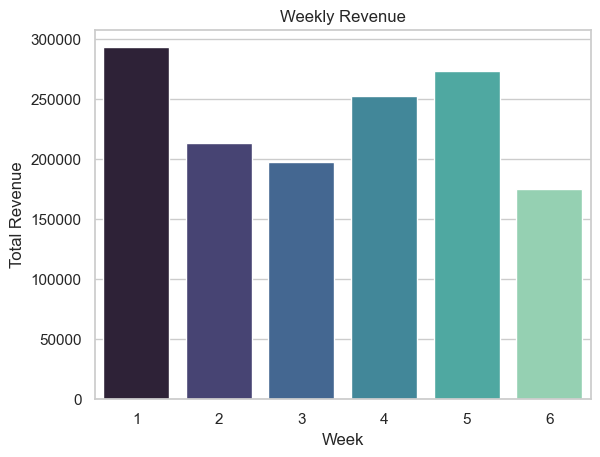

In [321]:
# Create a bar plot using Seaborn
_ = sns.barplot(x='week', y='total_revenue', data=weekly_revenue, palette='mako')

# Set xand y axis label
_ = plt.xlabel('Week')
_ = plt.ylabel('Total Revenue')

# Set plot title
_ = plt.title('Weekly Revenue')

# Show the plot
plt.show()